# Image Classification - Quick Start

:label:`sec_imgquick`


In this quick start, we'll use the task of image classification to illustrate how to use AutoGluon’s APIs. 

In this tutorial, we load images and the corresponding labels into AutoGluon and use this data to obtain a neural network that can classify new images. This is different from traditional machine learning where we need to manually define the neural network and then specify the hyperparameters in the training process. Instead, with just a single call to AutoGluon's [fit](/api/autogluon.task.html#autogluon.task.ImageClassification.fit) function, AutoGluon automatically trains many models with different hyperparameter configurations and returns the model that achieved the highest level of accuracy.

We begin by specifying [ImageClassification](/api/autogluon.task.html#autogluon.task.ImageClassification) as our task of interest as follows:

In [1]:
import autogluon as ag
from autogluon import ImageClassification as task

## Create AutoGluon Dataset

For demonstration purposes, we use a subset of the [Shopee-IET dataset](https://www.kaggle.com/c/shopee-iet-machine-learning-competition/data) from Kaggle.
Each image in this data depicts a clothing item and the corresponding label specifies its clothing category.
Our subset of the data contains the following possible labels: `BabyPants`, `BabyShirt`, `womencasualshoes`, `womenchiffontop`.

We download the data subset and unzip it using the following commands:

In [2]:
filename = ag.download('https://autogluon.s3.amazonaws.com/datasets/shopee-iet.zip')
ag.unzip(filename)

'data'

After the dataset is downloaded, we load it into a [`Dataset`](/api/autogluon.task.html#autogluon.task.ImageClassification.Dataset) object:

In [3]:
dataset = task.Dataset('data/train')

Load the test dataset as follows:

In [4]:
test_dataset = task.Dataset('data/test', train=False)

## Use AutoGluon to Fit Models

Now, we fit a classifier using AutoGluon as follows:

Starting Experiments
Num of Finished Tasks is 0
Num of Pending Tasks is 2


scheduler: FIFOScheduler(
DistributedResourceManager{
(Remote: Remote REMOTE_ID: 0, 
	<Remote: 'inproc://172.16.17.200/1767/1' processes=1 threads=8, memory=64.38 GB>, Resource: NodeResourceManager(8 CPUs, 1 GPUs))
})



Finished Task with config: {'net.choice': 0, 'optimizer.learning_rate': 0.0031622777, 'optimizer.wd': 0.0003162278} and reward: 0.6125


Finished Task with config: {'net.choice': 1, 'optimizer.learning_rate': 0.0013996700170719194, 'optimizer.wd': 0.00010156685625619916} and reward: 0.49375


Saving Training Curve in checkpoint/plot_training_curves.png


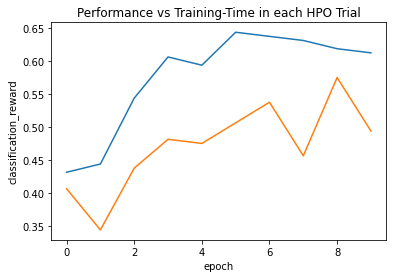

In [5]:
classifier = task.fit(dataset,
                      epochs=10,
                      ngpus_per_trial=1,
                      verbose=False)

Within `fit`, the dataset is automatically split into training and validation sets.
The model with the best hyperparameter configuration is selected based on its performance on the validation set.
The best model is finally retrained on our entire dataset (i.e., merging training+validation) using the best configuration.

The best Top-1 accuracy achieved on the validation set is as follows:

In [6]:
print('Top-1 val acc: %.3f' % classifier.results['best_reward'])

Top-1 val acc: 0.613


## Predict on a New Image

Given an example image, we can easily use the final model to `predict` the label (and the conditional class-probability):

In [7]:
# skip this if training FashionMNIST on CPU.
image = 'data/test/BabyShirt/BabyShirt_323.jpg'
ind, prob, _ = classifier.predict(image)

print('The input picture is classified as [%s], with probability %.2f.' %
      (dataset.init().classes[ind.asscalar()], prob.asscalar()))

The input picture is classified as [BabyShirt], with probability 0.66.


/home/ec2-user/anaconda3/envs/autogluon/lib/python3.7/site-packages/mxnet/gluon/data/vision/datasets.py:318: UserWarning: Ignoring data/train/BabyPants/.ipynb_checkpoints of type . Only support .jpg, .jpeg, .png
  filename, ext, ', '.join(self._exts)))


## Evaluate on Test Dataset

We now evaluate the classifier on a test dataset.

The validation and test top-1 accuracy are:

In [8]:
test_acc = classifier.evaluate(test_dataset)
print('Top-1 test acc: %.3f' % test_acc)


Top-1 test acc: 0.797
